# Wavelate Decomposition of Gradient Boosting Algorithm - Example 2 (WGB Details)

Wavelet Gradien Boostin (WGB) is an algorithm which based on two main XX - the well known algorith Gradient Boosting [YY] and the theory of Geometric Wavelets.
In this notebook we will describe some main points that makes WGB different from the classic GB algorithm.

While the classic algorithm GB is based on decision trees (tree-based GB), WGB is based on wavelet decomposition of decision tree, and the way of how to use it indside the algorithm.


 # Illustration of greedy node selection by wavelet norms


![title](./images/wavelet_Tree.png)
 

Each node in the decision tree have a corresponding geometric wavelet:
\begin{align}
\psi_{\Omega'} := \psi_{\Omega'}(f) = 1_{\Omega'}(Q_{\Omega'}-Q_{\Omega}) \\
\end{align}

which is the ‘local difference’ between the current node's prediction and the current node's parent's prediction.

That difference done between two levels in the tree, a ‘low resolution’ level and a ‘high resolution’ level.

As in the classic theory of Wavelets, the wavelets is sorted by wavelet norm, and then we choose the M wavelets with the highest norm as an M-term approximation.

At each boosting iteration, we build a decision tree, compute the wavelet norm for each node, and choose the M-term wavelets by evaluet the error of the M-term on randomlly selected validation set.

# Real Example of node selection along WGB iterations

In [58]:
import sys
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from xgboost import XGBClassifier,XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier

from WaveletGBoost.WaveletDecisionTreeClassifier import WaveletDecisionTreeClassifier
from WaveletGBoost.WaveletDecisionTreeRegressor import WaveletDecisionTreeRegressor
from WaveletGBoost.WaveletGBoostingClassifier import WaveletGBoostingClassifier
from WaveletGBoost.WaveletGBoostingRegressor import WaveletGBoostingRegrssor
import WaveletGBoost.wgbm_utils as wgbmu

from Datasets.utils.data_reader import data_reader

Regression Dataset loading 

In [59]:
data_path = './Datasets/regression/'
dataset_name = 'Prostate'
classification = False

X , y = data_reader (data_path = data_path, dataset_name=dataset_name ,classification=classification)

print ('Dataset:',dataset_name)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


Dataset: Prostate


In [60]:

wgbm = WaveletGBoostingRegrssor (max_depth=6,n_iterations=150,max_prun_precent=0.5)
wgbm.fit ( X_train , y_train )
y_pred = wgbm.predict(X_test)

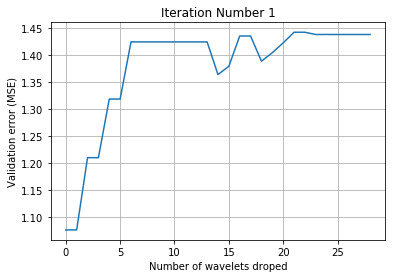

In [61]:
iteration = 0

WavelatNorm = wgbm.WavelatNorm_list[iteration]
wavelet_err_vec = wgbm.wavelet_err_vec_list[iteration]
fig, ax = plt.subplots()

ax.plot(range(len(WavelatNorm[:len(wavelet_err_vec)])),wavelet_err_vec)
ax.set(xlabel='Number of wavelets droped', ylabel='Validation error (MSE)',
       title='Iteration Number ' + str(iteration+1))
ax.grid()
plt.show()

At the first iteration, as you can see in the image above, the 'best' M-term approximation (in term of validation MSE) is the entire decision tree (0 wavelets to drop), which is make sense because in the first itrations the 'overfit' is small in general

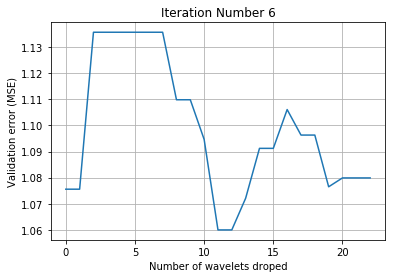

In [62]:
iteration = 5

WavelatNorm = wgbm.WavelatNorm_list[iteration]
wavelet_err_vec = wgbm.wavelet_err_vec_list[iteration]
fig, ax = plt.subplots()

ax.plot(range(len(WavelatNorm[:len(wavelet_err_vec)])),wavelet_err_vec)
ax.set(xlabel='Number of wavelets droped', ylabel='Validation error (MSE)',
       title='Iteration Number ' + str(iteration+1))
ax.grid()
plt.show()

At the 6th iteration, as you can see in the image above, the 'best' M-term approximation will be received by droping 11 or 12 wavelets, which implies that there is already some overfit in the entire tree.

Another intresting graph that you can plot easily is the MSE error as function of the algorithm's iterations, which can be used to choose a better n_iterations or to analyze the algorithm performance.

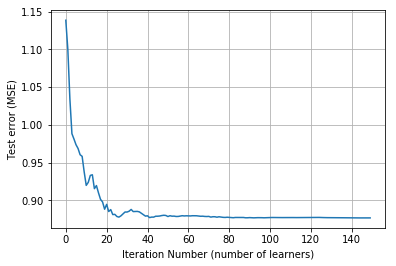

In [63]:
iter_mse = []
for i in range(len(wgbm.predictions_list)):
    iter_mse.append(wgbmu.MSE ( y_test , wgbm.predictions_list[i] ))

fig, ax = plt.subplots()

ax.plot(iter_mse)
ax.set(xlabel='Iteration Number (number of learners)', ylabel='Test error (MSE)',
       title='')
ax.grid()
plt.show()
